In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter('ignore')

In [2]:
d = pd.read_csv('Seattle/listings.csv')
d = d.replace('\\$', '', regex=True)
d = d.replace('\\,', '', regex=True)
d.price = d.price.astype(float)

# Business1 understanding

Airbnb is the online marketplace for lodging,
primarily homestays for vacation rentals, and tourism activities.
We will look at its objects, located in Seattle.

## Question 1
### Which factors are affecting price the most and how much they are affecting it?

In order to answer first part of this question we will make some exploratory analysis of the variables,
look at plots and draw conclusions.
For the second part we will train model and interpret results.
We will prefer linear model if possible, because we can interpret it more clearly.

## Question 2

### Are that apartments, which are underpriced according to our model, receiving more reviews per month?

The idea of this question is that underpriced apartments should be rented more often,
also they should exceed expectations if people who rented it, so they will want to
leave positive review.

## Question 3

### In which month of the year prices are the highest?

# Data understanding

First, let's take a look at some barplots and histograms in order to figure out,
relationship of different variables with the price.

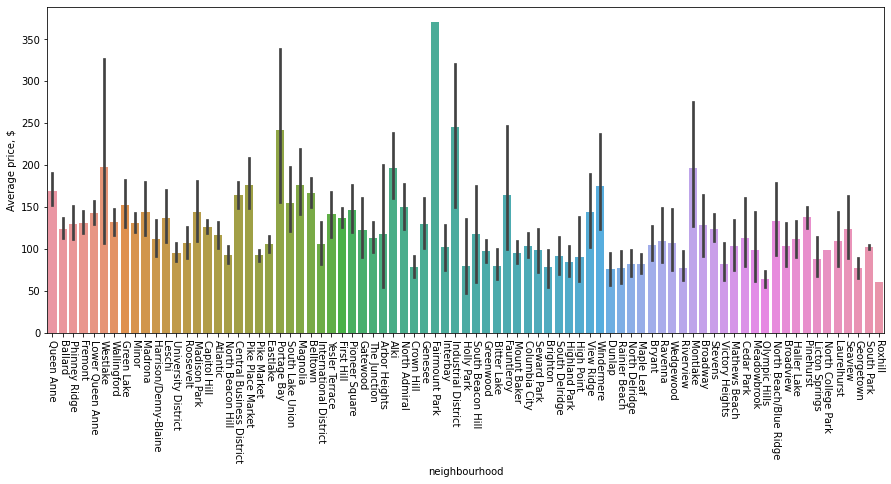

In [3]:
plt.figure(figsize = (15,6))
sns.barplot('neighbourhood', d.price, data=d)
plt.ylabel('Average price, $')
plt.xticks(rotation=-90)
plt.show()

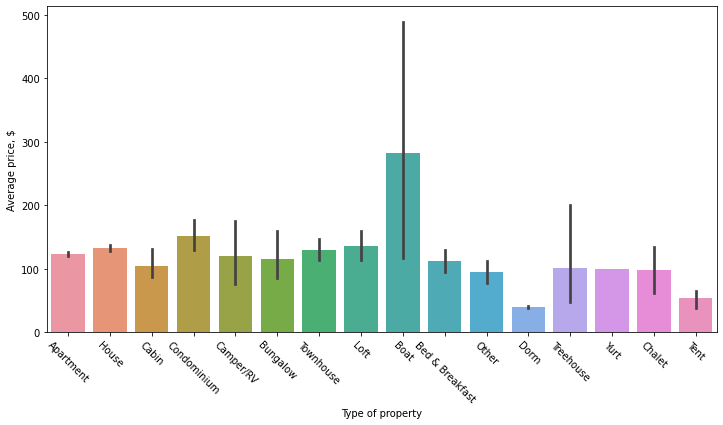

In [4]:
plt.figure(figsize = (12,6))
sns.barplot('property_type', 'price', data=d)
plt.xlabel('Type of property')
plt.ylabel('Average price, $')
plt.xticks(rotation=-45)
plt.show()

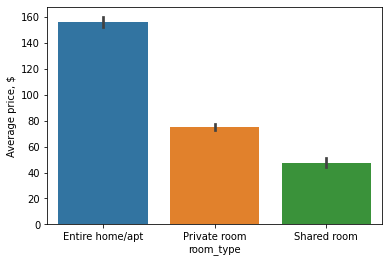

In [5]:
sns.barplot('room_type', 'price', data=d)
plt.ylabel('Average price, $')
plt.show()

<AxesSubplot:xlabel='room_type', ylabel='Count'>

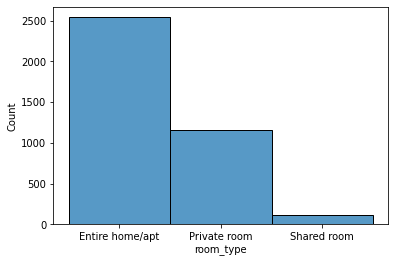

In [6]:
sns.histplot(d.room_type)

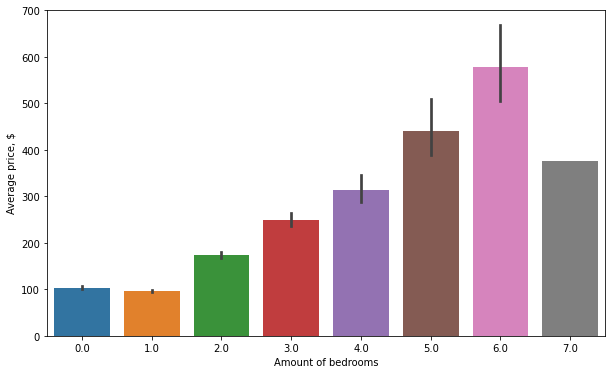

In [7]:
plt.figure(figsize = (10,6))
sns.barplot('bedrooms', 'price', data=d)
plt.ylabel('Average price, $')
plt.xlabel('Amount of bedrooms')
plt.show()

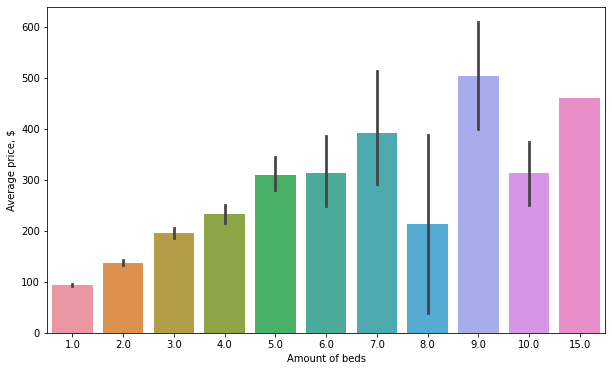

In [8]:
plt.figure(figsize = (10,6))
sns.barplot('beds', d.price, data=d)
plt.ylabel('Average price, $')
plt.xlabel('Amount of beds')
plt.show()

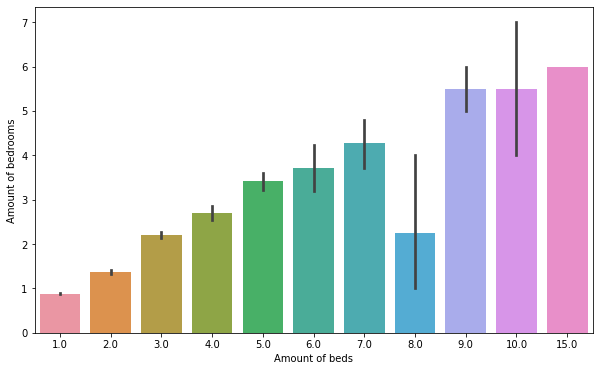

In [9]:
plt.figure(figsize = (10,6))
sns.barplot('beds', 'bedrooms', data=d)
plt.ylabel('Amount of bedrooms')
plt.xlabel('Amount of beds')
plt.show()

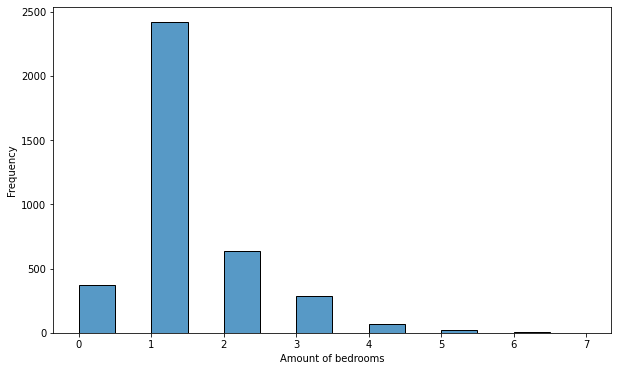

In [10]:
plt.figure(figsize = (10,6))
sns.histplot(d.bedrooms, binwidth=0.5)
plt.ylabel('Frequency')
plt.xlabel('Amount of bedrooms')
plt.show()

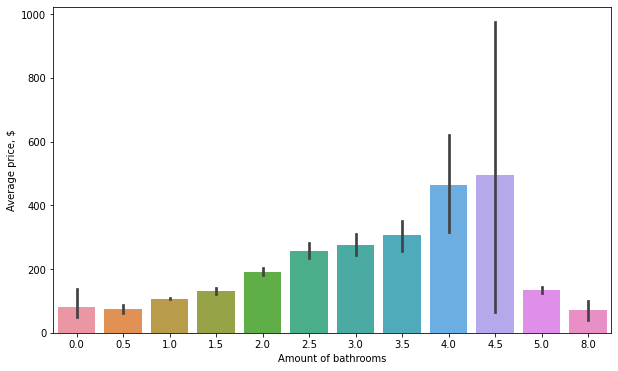

In [11]:
plt.figure(figsize = (10,6))
sns.barplot('bathrooms', 'price', data=d)
plt.xlabel('Amount of bathrooms')
plt.ylabel('Average price, $')
plt.show()

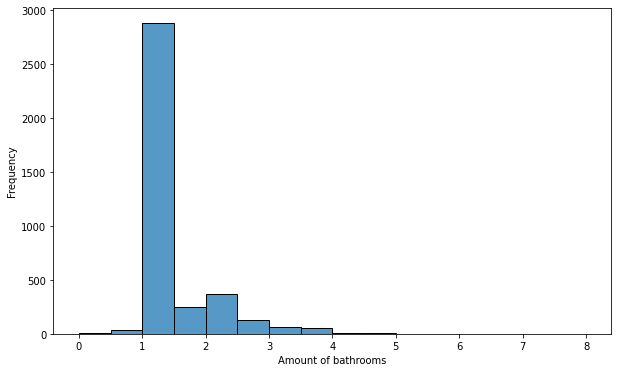

In [12]:
plt.figure(figsize = (10,6))
sns.histplot(d.bathrooms, binwidth=0.5)
plt.ylabel('Frequency')
plt.xlabel('Amount of bathrooms')
plt.show()

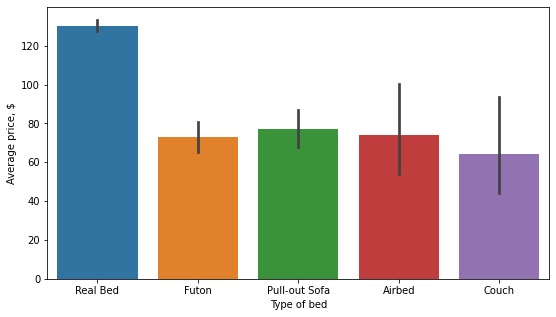

In [13]:
plt.figure(figsize = (9,5))
sns.barplot('bed_type', 'price', data=d)
plt.xlabel('Type of bed')
plt.ylabel('Average price, $')
plt.show()

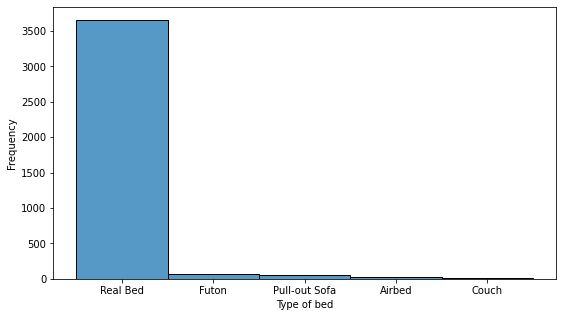

In [14]:
plt.figure(figsize = (9,5))
sns.histplot(d.bed_type)
plt.ylabel('Frequency')
plt.xlabel('Type of bed')
plt.show()

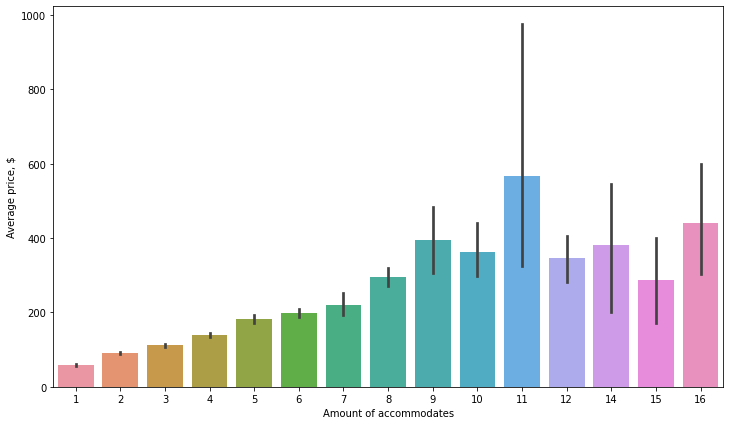

In [15]:
plt.figure(figsize = (12,7))
sns.barplot('accommodates', 'price', data=d)
plt.ylabel('Average price, $')
plt.xlabel('Amount of accommodates')
plt.show()

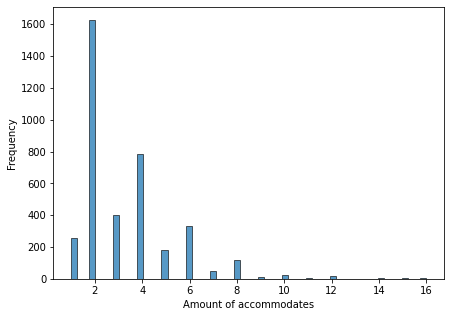

In [16]:
plt.figure(figsize = (7,5))
sns.histplot(d.accommodates)
plt.ylabel('Frequency')
plt.xlabel('Amount of accommodates')
plt.show()

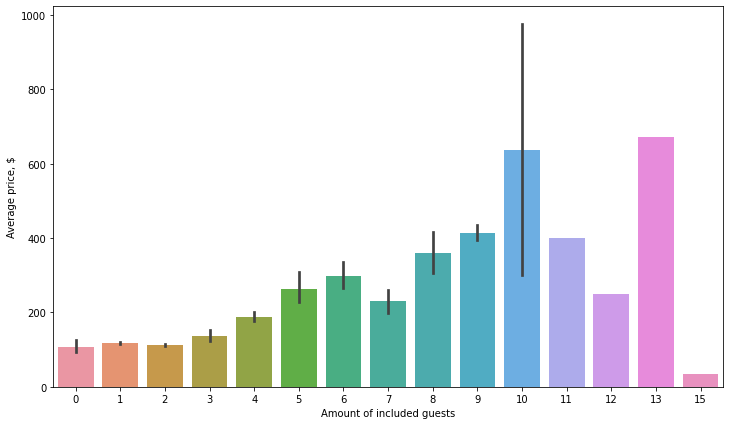

In [17]:
plt.figure(figsize = (12,7))
sns.barplot('guests_included', 'price', data=d)
plt.ylabel('Average price, $')
plt.xlabel('Amount of included guests')
plt.show()

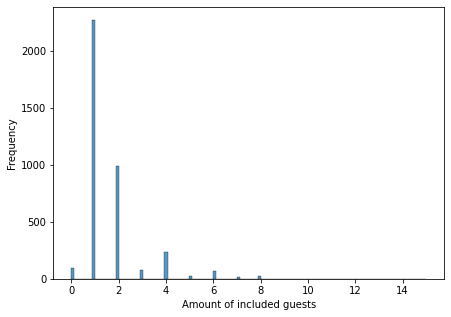

In [18]:
plt.figure(figsize = (7,5))
sns.histplot(d.guests_included)
plt.ylabel('Frequency')
plt.xlabel('Amount of included guests')
plt.show()


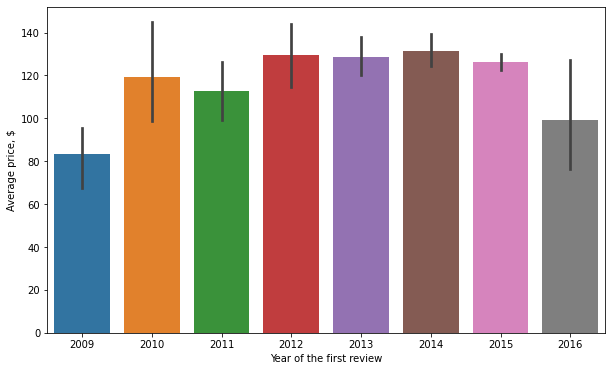

In [19]:
plt.figure(figsize = (10,6))
sns.barplot(d.first_review.str[:4], d.price, order = ['2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016'])
plt.ylabel('Average price, $')
plt.xlabel('Year of the first review')
plt.show()

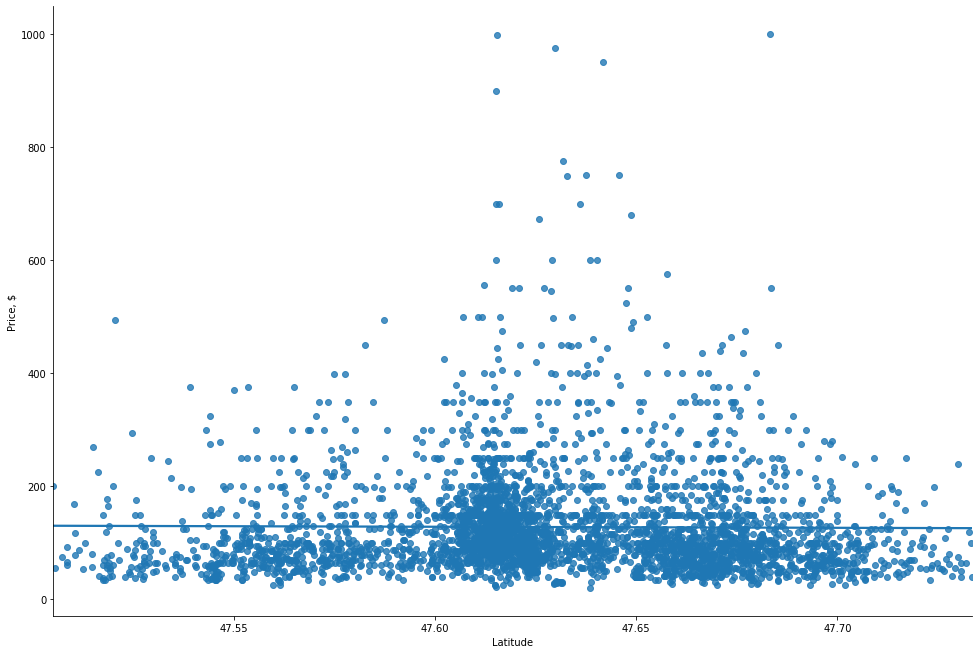

In [20]:
sns.lmplot('latitude', 'price', data=d, ci=0.95, height=9, aspect=1.5)
plt.ylabel('Price, $')
plt.xlabel('Latitude')
plt.show()

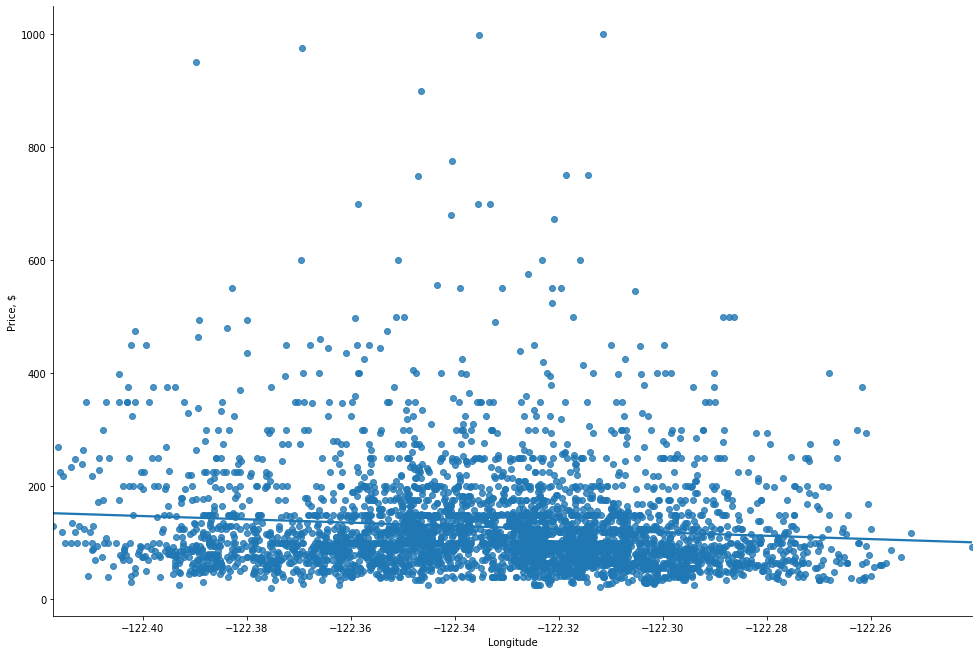

In [21]:
sns.lmplot('longitude', 'price', data=d, ci=0.95, height=9, aspect=1.5)
plt.ylabel('Price, $')
plt.xlabel('Longitude')
plt.show()

From this plots I will make next assumptions:

Neigborhoods: there is a lot of them,
so not much data about each one, not reliable.

Type of property: looks like it doesn't affect price much.

Type of room: affects price very much.

Amount of bedrooms: looks like linear relationship between this variable and the price.

Amount of beds: doesn't seem to be important by its own, beside be correlated with amount of bedrooms.
Because the relationship of this variable with price is very similar
to relationship of this variable with amount of bedrooms.

Amount of bathrooms: Usually there is only 1 bathroom, sometimes
there is up to 4 and in those case price increases linearly.

Type of bed: rooms with real bed are almost twice more expensive.
Though there is not much rooms with other types of beds, so it will not
particular useful for our model.
Still, we might use it after combining all other types in one.

Amount of accommodates: looks like linear enough relationship with the price.

Amount of guests included: overall it's increases price, but there is no significance difference between rooms,
where 1 and 2 guested included, and this 2 options are the most common.
Because of that I'm not sure if we should include it in our model, but we may try.

Year of first review: we don't see any significant there.

Latitude and longitude: probably we could use this variables better, using some spatial methods, but we will keep it simple.
Longitude has some weak linear relationship with the price and we will use it.

### Prepare data

All we need to do is combine all types of bed beside "Real bed" into single class "Other".

In [22]:
d.loc[d.bed_type != 'Real Bed', 'bed_type'] = 'Other'


# Modeling

We will try to build linear model with price as depended variable
and with this set of independed variables:
- type of room
- bathrooms
- bedrooms
- type of bed
- accommodates
- guests included
- longitude

In [23]:
formula = 'price ~ room_type + bathrooms + bedrooms + bed_type + accommodates + guests_included + longitude'
model = sm.formula.ols(formula=formula, data=d).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.531
Model:                            OLS   Adj. R-squared:                  0.530
Method:                 Least Squares   F-statistic:                     536.7
Date:                Fri, 05 Nov 2021   Prob (F-statistic):               0.00
Time:                        10:16:04   Log-Likelihood:                -21046.
No. Observations:                3796   AIC:                         4.211e+04
Df Residuals:                    3787   BIC:                         4.217e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept                 -1.662e+04   3891.611     -4.270      0.000   -2.42e+04   -8985.837
room_type[T.Private room]   -44.2662      2.555    -17.324      0.000     -49.276     -39.256
room_type[T.Shared room]    -69.0042      6.261    -11.021      0.000     -81.280     -56.729
bed_type[T.Real Bed]          2.4045      5.196      0.463      0.644      -7.783      12.592
bathrooms                    31.8811      2.191     14.549      0.000      27.585      36.177
bedrooms                     28.4655      1.951     14.592      0.000      24.641      32.290
accommodates                  8.3138      0.953      8.723      0.000       6.445      10.182
guests_included               2.8197      0.910      3.100      0.002       1.036       4.603
longitude                  -136.0794     31.810     -4.278      0.000    -198.446     -73.712
==============================================================================
Omnibus:                     3181.393   Durbin-Watson:                   1.865
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           185095.452
Skew:                           3.622   Prob(JB):                         0.00
Kurtosis:                      36.433   Cond. No.                     4.74e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.74e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

<br>
We have too few observation with other type of bed, than "Real bed"
in order for difference between those two groups be statistically significant.
Other estimators are significant, so we can interpret them after testing for multicollinearity.

## Testing for multicollinearity

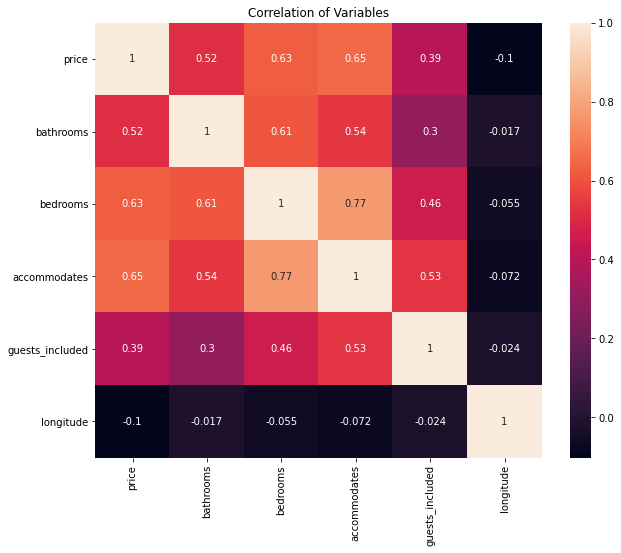

,VIF Factor,Variable
1,1.365034,room_type[T.Private room]
2,1.157613,room_type[T.Shared room]
3,1.077539,bed_type[T.Real Bed]
4,1.656148,bathrooms
5,2.944854,bedrooms
6,3.521245,accommodates
7,1.410764,guests_included
8,1.011006,longitude


In [24]:
from patsy import dmatrices
d2 = d[['price', 'room_type', 'bathrooms', 'bedrooms', 'bed_type', 'accommodates', 'guests_included', 'longitude']]
d3 = d[['room_type', 'bathrooms', 'bedrooms', 'bed_type', 'accommodates', 'guests_included', 'longitude']]

plt.figure(figsize = (10,8))
sns.heatmap(d2.corr(), annot=True)
plt.title('Correlation of Variables')
plt.show()

features = '+'.join(d3.columns)
y, X = dmatrices('price ~' + features, d2, return_type='dataframe')
vif = pd.DataFrame()
vif['VIF Factor'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['Variable'] = X.columns
vif.iloc[1:, :]

Situation with multicollinearity isn't so bad.
If we would remove amount of beds and accommodates from our model,
other variables probably would be interpreted more precisely,
but it should be ok with this variables as well,
since their VIF factor is less, than 5. Let's keep them both.

So only change we will make to our model is removing type of beds due insignificance of that predictor.

In [25]:
formula = 'price ~ room_type + bathrooms + bedrooms + accommodates + guests_included + longitude'
model = sm.formula.ols(formula=formula, data=d).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.531
Model:                            OLS   Adj. R-squared:                  0.530
Method:                 Least Squares   F-statistic:                     613.4
Date:                Fri, 05 Nov 2021   Prob (F-statistic):               0.00
Time:                        10:16:04   Log-Likelihood:                -21047.
No. Observations:                3796   AIC:                         4.211e+04
Df Residuals:                    3788   BIC:                         4.216e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept                 -1.656e+04   3889.277     -4.258      0.000   -2.42e+04   -8933.696
room_type[T.Private room]   -44.3677      2.546    -17.429      0.000     -49.359     -39.377
room_type[T.Shared room]    -69.6614      6.097    -11.425      0.000     -81.616     -57.707
bathrooms                    31.9136      2.190     14.573      0.000      27.620      36.207
bedrooms                     28.4715      1.951     14.596      0.000      24.647      32.296
accommodates                  8.3259      0.953      8.740      0.000       6.458      10.194
guests_included               2.8100      0.909      3.090      0.002       1.027       4.593
longitude                  -135.6344     31.792     -4.266      0.000    -197.966     -73.302
==============================================================================
Omnibus:                     3181.207   Durbin-Watson:                   1.865
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           185044.826
Skew:                           3.621   Prob(JB):                         0.00
Kurtosis:                      36.429   Cond. No.                     4.73e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.73e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# Question 1
### Which factors are affecting price the most and how much they are affecting it?

So. According to our linear model,
every bedroom or bathroom increases price of apartments approximately by 30$\$$.

If apartments isn't entire home/apt, but private room, it's 44$\$$ cheaper
(when other variables, like amount of bedrooms, are the same, which is probably not).
If it's shared room, then 70$\$$ cheaper.

Every additional accommodate increases price by 8$\$$. Every guest included by 3$.

Type of bed other, than real bed, probably decreases price by 2.5$\$$, but
we aren't sure about that, since there isn't enough data about other bed types.

Apartments, located to the west, costs more. Longitude of Airbnb apartments in Seattle
varies from -122.41 degree to -122.24 (lower longitude is west),
and each 0.01 degree to the east decreases price of apartment by 1.4$\$$

This variables are explaining 53% of price variability.

# Question 2
### Are that apartments, which are underpriced according to our model, receiving more reviews per month?

In order to find the answer we will check plot of residuals against reviews
with fitted linear model first and then will decide, how to process it next.

## Lmplot

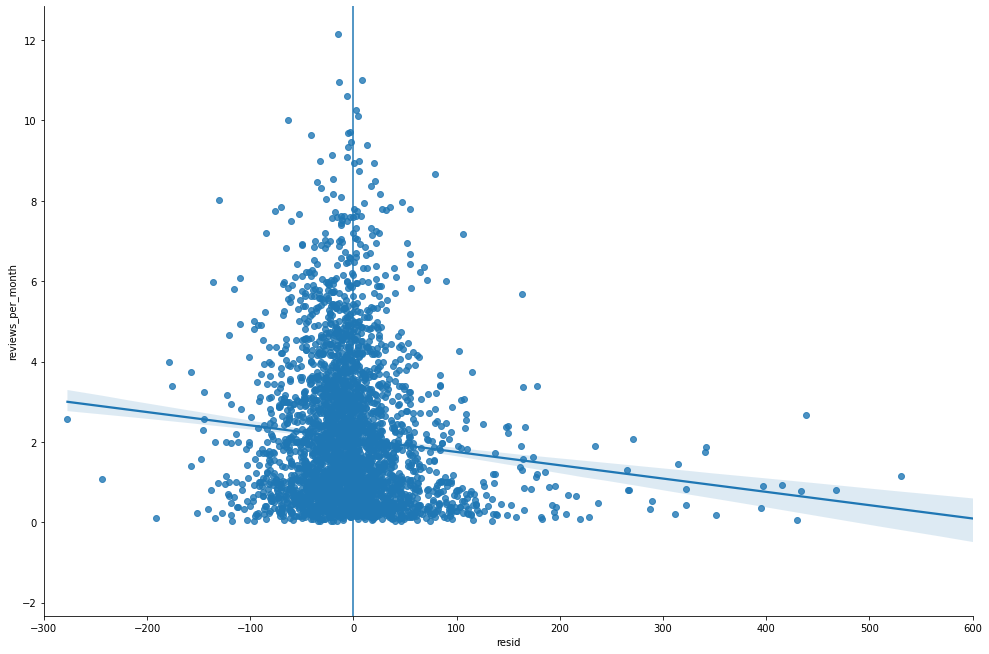

In [26]:
# When the model was fitted, NA's were removed from the data.
# Now we want to bind residuals with original data, so we need remove
# rows with those NA's from original data as well.
d.dropna(subset=['bathrooms', 'bedrooms'], inplace=True)
d['resid'] = model.resid.array

sns.lmplot('resid', 'reviews_per_month', data=d, height=9, aspect=1.5)
plt.xlim(-300, 600)
plt.axvline(x=0)
plt.show()

Since distribution of residuals is more or less normal, the range of amount of reviews
for residuals close to zero is wider, that's why it might look something
like normal distribution, but it's deceiving. Let's transform this data
similar to histogram transformation — we will split X-axis, i.e. residuals,
into intervals with width 30 and calculate average amount of reviews for each of that bins.

## Histogram-alike plot

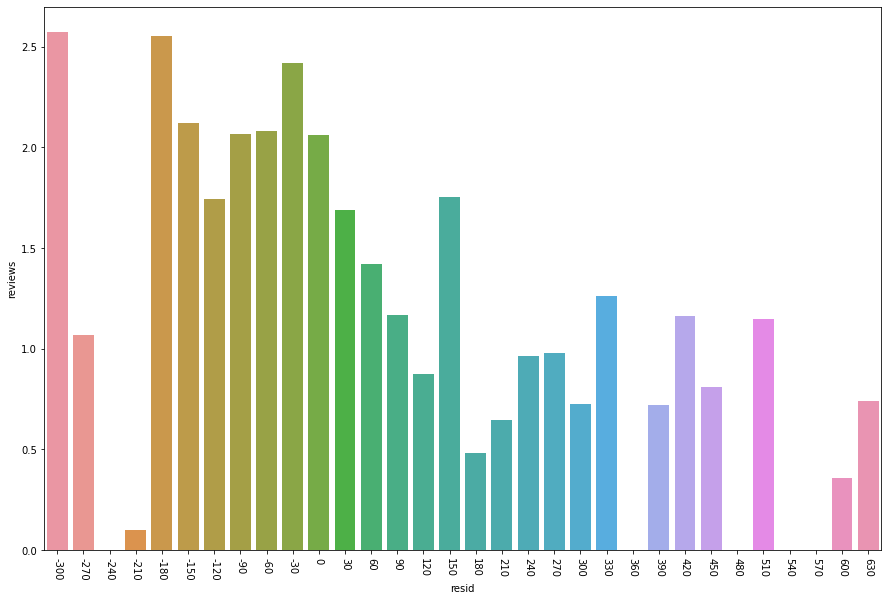

In [27]:
ma = pd.DataFrame()
n = 30
for x in range(-300, 640, n):
    ma.loc[int((x+300)/n), 'resid'] = x
    ma.loc[int((x+300)/n), 'reviews'] = d.loc[(d.resid >= x) & (d.resid < x+n), 'reviews_per_month'].dropna().mean()
    # We want to take mean, but there is a lot of NA's in reviews per month,
    # so we should ignore them for calculating mean.
ma.resid = ma.resid.astype(int)

plt.figure(figsize = (15,10))
sns.barplot('resid', 'reviews', data=ma)
plt.xticks(rotation=-90)
plt.show()

## Conclusions

Apartments, which are overpriced according to linear model from previous question,
receiving less reviews per month. But we can't say the same about underpriced
apartments - they aren't noticeable different in average amount of reviews from
apartments with the price, matched to our model.

# Question 3
### In which month of the year prices are the highest?

The question is simple, but finding the answer
might be not as straigh-forward, as we could expect it to be.
The problem is that we don't have prices for each month for most apartments
(33% of "price" variable is missing,
because apartments weren't available for whole year),
so we can't just take the mean price for month for every apartment and then
take mean of that means for each month. We need some different approach.

1. Within each apartment we will calculate average price for each month.
Only months with known prices will be counted.
2. We will count for each month, how many months within that apartment
have lower average price and how many - higher.
3. Then we will sum up this amount of higher/lower months for each month
among all apartments.
4. Relationship of this 2 numbers for each month will indicate its relative prices.

It's not the perfect algorithm, but
I think it should give us correct answer to our question.

We are starting with data like this:

In [28]:
d = pd.read_csv('Seattle/calendar.csv')
d

,listing_id,date,available,price
0,241032,2016-01-04,t,$85.00
1,241032,2016-01-05,t,$85.00
2,241032,2016-01-06,f,NaN
3,241032,2016-01-07,f,NaN
4,241032,2016-01-08,f,NaN
...,...,...,...,...
1393565,10208623,2016-12-29,f,NaN
1393566,10208623,2016-12-30,f,NaN
1393567,10208623,2016-12-31,f,NaN
1393568,10208623,2017-01-01,f,NaN


In [29]:
d['month'] = d.date.str[5:7].astype(int)
d.price = d.price\
    .str.replace('$', '')\
    .str.replace('\\,', '')\
    .str.replace('\\.00', '')\
    .str.replace('nan', 'NaN')\
    .astype(float)


In [30]:
d['price'] = d.groupby(['listing_id', 'month']).transform(lambda x: x.mean())
d['multi_index'] = d.listing_id + d.month
d.drop_duplicates(subset = 'multi_index', inplace=True)
d = d[['listing_id', 'month', 'price']]
d2 = d.pivot(columns='month', values='price', index='listing_id')

After some transformations it looks like this:

In [31]:
d2

month,1,2,3,4,5,6,7,8,9,10,11,12
listing_id,,,,,,,,,,,,
3335,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000
4291,82.000000,82.000000,82.000000,82.000000,82.000000,82.000000,82.000000,82.000000,82.000000,82.000000,82.000000,82.000000
5682,49.636364,52.826087,53.000000,53.000000,56.640000,60.000000,60.000000,60.000000,53.133333,48.580645,48.533333,48.645161
6606,92.666667,92.758621,92.580645,93.333333,92.580645,92.666667,93.225806,92.580645,93.000000,92.903226,92.666667,93.225806
7369,85.000000,85.000000,85.000000,85.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
10332096,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000
10334184,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000
10339144,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [32]:
plus = []
minus = []
for i in range(12):
    plus.append(0)
    minus.append(0)

for apart in range(d2.shape[0]):
    for m in range(12):
        for m2 in range(12):
            if(m != m2):
                if(d2.iloc[apart, m] >= d2.iloc[apart, m2]):
                    plus[m] += 1
                if(d2.iloc[apart, m] <= d2.iloc[apart, m2]):
                    minus[m] += 1

In [33]:
d3 = pd.DataFrame()
import calendar

for i in range(12):
    d3.loc[i, 'Month'] = calendar.month_name[i+1]
    d3.loc[i, 'Higher average price'] = plus[i]
    d3.loc[i, 'Lower average price'] = minus[i]

Then, after step 3 we have two vectors:

In [34]:
d3

,Month,Higher average price,Lower average price
0,January,16533.0,26787.0
1,February,15266.0,21561.0
2,March,16529.0,23048.0
3,April,22409.0,18061.0
4,May,19805.0,21191.0
5,June,22231.0,18918.0
6,July,24498.0,15506.0
7,August,21203.0,19976.0
8,September,23089.0,17907.0
9,October,20989.0,20404.0


In [35]:
scores = []
for i in range(12):
    scores.append(round((plus[i] / minus[i]) * 100))

In [36]:
scores_df = pd.DataFrame()
for i, score in enumerate(scores):
    scores_df.loc[i, 'Month'] = calendar.month_name[i+1]
    scores_df.loc[i, 'Score'] = score
scores_df.Score = scores_df.Score.astype(int)
scores_df.index = range(1, 13)

### Relative prices for each month
Finally, after dividing column "Higher" on column "Lower" and multiplying it by 100
we have table with resulting scores for each month.
Score 100 means average prices.

In [37]:
scores_df

,Month,Score
1,January,62
2,February,71
3,March,72
4,April,124
5,May,93
6,June,118
7,July,158
8,August,106
9,September,129
10,October,103


As we can see from this table, winter is the most cheap season,
summer is the most expensive. In July prices are the highest.

Below is same data as barplot.

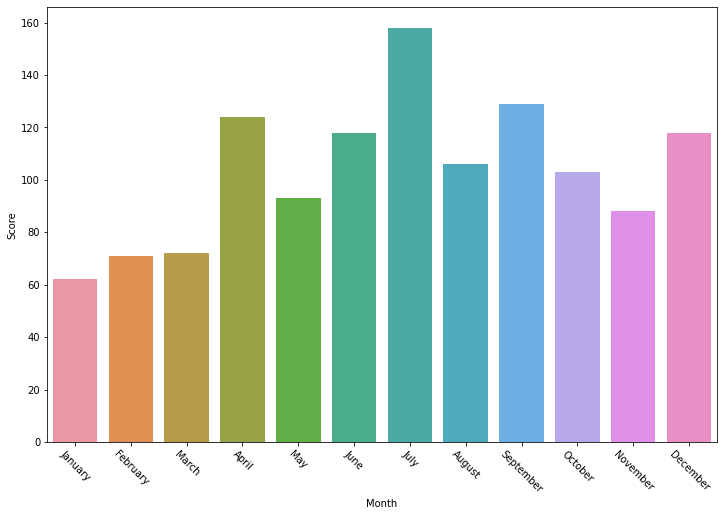

In [38]:
plt.figure(figsize = (12,8))
sns.barplot('Month', 'Score', data = scores_df)
plt.xticks(rotation=-45)
plt.show()